In [160]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# PCA Model
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

Joining Train and Test

In [4]:
data_test['revenue'] = None

In [5]:
data_all = data_train.append(data_test,ignore_index=True)

In [6]:
data_all.shape

(7398, 23)

In [7]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 23 columns):
id                       7398 non-null int64
belongs_to_collection    1481 non-null object
budget                   7398 non-null int64
genres                   7375 non-null object
homepage                 2366 non-null object
imdb_id                  7398 non-null object
original_language        7398 non-null object
original_title           7398 non-null object
overview                 7376 non-null object
popularity               7398 non-null float64
poster_path              7396 non-null object
production_companies     6984 non-null object
production_countries     7241 non-null object
release_date             7397 non-null object
runtime                  7392 non-null float64
spoken_languages         7336 non-null object
status                   7396 non-null object
tagline                  5938 non-null object
title                    7395 non-null object
Keywords           

In [8]:
data_all.isnull().sum()*100/len(data_all.index)

id                        0.000000
belongs_to_collection    79.981076
budget                    0.000000
genres                    0.310895
homepage                 68.018383
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.297378
popularity                0.000000
poster_path               0.027034
production_companies      5.596107
production_countries      2.122195
release_date              0.013517
runtime                   0.081103
spoken_languages          0.838064
status                    0.027034
tagline                  19.735064
title                     0.040552
Keywords                  9.042985
cast                      0.351446
crew                      0.513652
revenue                  59.448500
dtype: float64

Dropping variable with huge missing value

In [9]:
data_all.drop(['belongs_to_collection','homepage'],axis=1,inplace=True)

In [10]:
data_all.isnull().sum()*100/len(data_all.index)

id                       0.000000
budget                   0.000000
genres                   0.310895
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.297378
popularity               0.000000
poster_path              0.027034
production_companies     5.596107
production_countries     2.122195
release_date             0.013517
runtime                  0.081103
spoken_languages         0.838064
status                   0.027034
tagline                 19.735064
title                    0.040552
Keywords                 9.042985
cast                     0.351446
crew                     0.513652
revenue                 59.448500
dtype: float64

In [11]:
data_all.drop('tagline',axis=1,inplace=True)

In [12]:
data_all.isnull().sum()*100/len(data_all.index)

id                       0.000000
budget                   0.000000
genres                   0.310895
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.297378
popularity               0.000000
poster_path              0.027034
production_companies     5.596107
production_countries     2.122195
release_date             0.013517
runtime                  0.081103
spoken_languages         0.838064
status                   0.027034
title                    0.040552
Keywords                 9.042985
cast                     0.351446
crew                     0.513652
revenue                 59.448500
dtype: float64

In [13]:
data_all['p_company'] = data_all.production_companies.str.split(':').str.len()
data_all['p_company'].fillna(0,inplace=True)

In [14]:
data_all.drop('production_companies',axis=1,inplace=True)

In [15]:
data_all.isnull().sum()*100/len(data_all.index)

id                       0.000000
budget                   0.000000
genres                   0.310895
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.297378
popularity               0.000000
poster_path              0.027034
production_countries     2.122195
release_date             0.013517
runtime                  0.081103
spoken_languages         0.838064
status                   0.027034
title                    0.040552
Keywords                 9.042985
cast                     0.351446
crew                     0.513652
revenue                 59.448500
p_company                0.000000
dtype: float64

In [16]:
data_all['s_genre'] = data_all.genres.str.split('}').str[0]

In [17]:
data_all['s_genre'] = data_all.s_genre.str.split(':').str[2]

In [18]:
data_all['s_genre'].fillna('Other',inplace=True)

In [19]:
data_all['s_genre'] = data_all.s_genre.str.strip(' \'')

In [20]:
data_all['s_genre'].value_counts()

Drama              1934
Comedy             1568
Action             1195
Adventure           474
Horror              403
Crime               333
Thriller            259
Animation           188
Documentary         188
Fantasy             182
Romance             176
Science Fiction     116
Mystery              91
Family               79
War                  50
Music                49
Western              44
History              39
Other                23
Foreign               6
TV Movie              1
Name: s_genre, dtype: int64

In [21]:
data_all.drop('genres',axis=1,inplace=True)

In [22]:
data_all.isnull().sum()*100/len(data_all.index)

id                       0.000000
budget                   0.000000
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.297378
popularity               0.000000
poster_path              0.027034
production_countries     2.122195
release_date             0.013517
runtime                  0.081103
spoken_languages         0.838064
status                   0.027034
title                    0.040552
Keywords                 9.042985
cast                     0.351446
crew                     0.513652
revenue                 59.448500
p_company                0.000000
s_genre                  0.000000
dtype: float64

In [23]:
data_all['n_keyword'] = data_all.Keywords.str.split('{').str.len()

In [24]:
data_all['n_keyword'].fillna(0,inplace=True)

In [25]:
data_all.drop('Keywords',axis=1,inplace=True)

In [26]:
data_all.isnull().sum()*100/len(data_all.index)

id                       0.000000
budget                   0.000000
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.297378
popularity               0.000000
poster_path              0.027034
production_countries     2.122195
release_date             0.013517
runtime                  0.081103
spoken_languages         0.838064
status                   0.027034
title                    0.040552
cast                     0.351446
crew                     0.513652
revenue                 59.448500
p_company                0.000000
s_genre                  0.000000
n_keyword                0.000000
dtype: float64

In [27]:
data_all['p_country'] = data_all.production_countries.str.split(':').str[1]

In [28]:
data_all['p_country'] = data_all.p_country.str.split(',').str[0]

In [29]:
data_all['p_country'] = data_all.p_country.str.strip(' \' ')

In [30]:
data_all['p_country'].fillna('Other',inplace=True)

In [31]:
Country_weight = pd.DataFrame(data_all['p_country'].value_counts())

In [32]:
data_all = data_all.merge(Country_weight,how='left',left_on='p_country',right_index=True)

In [33]:
data_all.drop('p_country_x',axis=1,inplace=True)

In [34]:
data_all.isnull().sum()*100/len(data_all.index)

id                       0.000000
budget                   0.000000
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.297378
popularity               0.000000
poster_path              0.027034
production_countries     2.122195
release_date             0.013517
runtime                  0.081103
spoken_languages         0.838064
status                   0.027034
title                    0.040552
cast                     0.351446
crew                     0.513652
revenue                 59.448500
p_company                0.000000
s_genre                  0.000000
n_keyword                0.000000
p_country_y              0.000000
dtype: float64

In [35]:
data_all.drop('production_countries',axis=1,inplace=True)

In [36]:
data_all.isnull().sum()*100/len(data_all.index)

id                    0.000000
budget                0.000000
imdb_id               0.000000
original_language     0.000000
original_title        0.000000
overview              0.297378
popularity            0.000000
poster_path           0.027034
release_date          0.013517
runtime               0.081103
spoken_languages      0.838064
status                0.027034
title                 0.040552
cast                  0.351446
crew                  0.513652
revenue              59.448500
p_company             0.000000
s_genre               0.000000
n_keyword             0.000000
p_country_y           0.000000
dtype: float64

In [37]:
data_all['s_lang'] = data_all.spoken_languages.str.split(':').str[1]

In [38]:
data_all['s_lang'] = data_all.s_lang.str.split(',').str[0]

In [39]:
data_all['s_lang'] = data_all.s_lang.str.strip(' \' ')

In [40]:
data_all.isnull().sum()*100/len(data_all.index)

id                    0.000000
budget                0.000000
imdb_id               0.000000
original_language     0.000000
original_title        0.000000
overview              0.297378
popularity            0.000000
poster_path           0.027034
release_date          0.013517
runtime               0.081103
spoken_languages      0.838064
status                0.027034
title                 0.040552
cast                  0.351446
crew                  0.513652
revenue              59.448500
p_company             0.000000
s_genre               0.000000
n_keyword             0.000000
p_country_y           0.000000
s_lang                0.838064
dtype: float64

In [41]:
data_all['s_lang'].fillna('Other',inplace=True)

In [42]:
data_all.isnull().sum()*100/len(data_all.index)

id                    0.000000
budget                0.000000
imdb_id               0.000000
original_language     0.000000
original_title        0.000000
overview              0.297378
popularity            0.000000
poster_path           0.027034
release_date          0.013517
runtime               0.081103
spoken_languages      0.838064
status                0.027034
title                 0.040552
cast                  0.351446
crew                  0.513652
revenue              59.448500
p_company             0.000000
s_genre               0.000000
n_keyword             0.000000
p_country_y           0.000000
s_lang                0.000000
dtype: float64

In [43]:
data_all.drop('spoken_languages',axis=1,inplace=True)

In [44]:
lang_count = pd.DataFrame(data_all['s_lang'].value_counts())

In [45]:
data_all = data_all.merge(lang_count,how='left',left_on='s_lang',right_index=True)

In [46]:
data_all.isnull().sum()*100/len(data_all.index)

id                    0.000000
budget                0.000000
imdb_id               0.000000
original_language     0.000000
original_title        0.000000
overview              0.297378
popularity            0.000000
poster_path           0.027034
release_date          0.013517
runtime               0.081103
status                0.027034
title                 0.040552
cast                  0.351446
crew                  0.513652
revenue              59.448500
p_company             0.000000
s_genre               0.000000
n_keyword             0.000000
p_country_y           0.000000
s_lang_x              0.000000
s_lang_y              0.000000
dtype: float64

In [47]:
data_all.drop('s_lang_x',axis=1,inplace=True)

In [48]:
data_all.isnull().sum()*100/len(data_all.index)

id                    0.000000
budget                0.000000
imdb_id               0.000000
original_language     0.000000
original_title        0.000000
overview              0.297378
popularity            0.000000
poster_path           0.027034
release_date          0.013517
runtime               0.081103
status                0.027034
title                 0.040552
cast                  0.351446
crew                  0.513652
revenue              59.448500
p_company             0.000000
s_genre               0.000000
n_keyword             0.000000
p_country_y           0.000000
s_lang_y              0.000000
dtype: float64

In [49]:
o_lang = pd.DataFrame(data_all['original_language'].value_counts())

In [50]:
data_all = data_all.merge(o_lang,how='left',left_on='original_language',right_index=True)

In [51]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_language_x     0.000000
original_title          0.000000
overview                0.297378
popularity              0.000000
poster_path             0.027034
release_date            0.013517
runtime                 0.081103
status                  0.027034
title                   0.040552
cast                    0.351446
crew                    0.513652
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [52]:
data_all.drop('original_language_x',axis=1,inplace=True)

In [53]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_title          0.000000
overview                0.297378
popularity              0.000000
poster_path             0.027034
release_date            0.013517
runtime                 0.081103
status                  0.027034
title                   0.040552
cast                    0.351446
crew                    0.513652
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [54]:
data_all['crew'] = data_all.crew.str.split('{').str.len()

In [55]:
data_all['crew'].fillna(0,inplace=True)

In [56]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_title          0.000000
overview                0.297378
popularity              0.000000
poster_path             0.027034
release_date            0.013517
runtime                 0.081103
status                  0.027034
title                   0.040552
cast                    0.351446
crew                    0.000000
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [57]:
data_all.drop('cast',axis=1,inplace=True)

In [58]:
data_all.drop(['title','status'],axis=1,inplace=True)

In [59]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_title          0.000000
overview                0.297378
popularity              0.000000
poster_path             0.027034
release_date            0.013517
runtime                 0.081103
crew                    0.000000
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [60]:
data_all['overview'] = data_all.overview.str.len()

In [61]:
data_all['overview'].fillna(0,inplace=True)

In [62]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_title          0.000000
overview                0.000000
popularity              0.000000
poster_path             0.027034
release_date            0.013517
runtime                 0.081103
crew                    0.000000
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [63]:
data_all.drop('poster_path',axis=1,inplace=True)

In [64]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_title          0.000000
overview                0.000000
popularity              0.000000
release_date            0.013517
runtime                 0.081103
crew                    0.000000
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [65]:
data_all['runtime'].fillna(data_all['runtime'].mean(),inplace=True)

In [66]:
data_all.isnull().sum()*100/len(data_all.index)

id                      0.000000
budget                  0.000000
imdb_id                 0.000000
original_title          0.000000
overview                0.000000
popularity              0.000000
release_date            0.013517
runtime                 0.000000
crew                    0.000000
revenue                59.448500
p_company               0.000000
s_genre                 0.000000
n_keyword               0.000000
p_country_y             0.000000
s_lang_y                0.000000
original_language_y     0.000000
dtype: float64

In [67]:
data_all['release_date'] = pd.to_datetime(data_all['release_date'])

In [68]:
data_all['r_year'] = data_all.release_date.dt.year

In [69]:
data_all['r_month'] = data_all.release_date.dt.month

In [70]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 18 columns):
id                     7398 non-null int64
budget                 7398 non-null int64
imdb_id                7398 non-null object
original_title         7398 non-null object
overview               7398 non-null float64
popularity             7398 non-null float64
release_date           7397 non-null datetime64[ns]
runtime                7398 non-null float64
crew                   7398 non-null float64
revenue                3000 non-null object
p_company              7398 non-null float64
s_genre                7398 non-null object
n_keyword              7398 non-null float64
p_country_y            7398 non-null int64
s_lang_y               7398 non-null int64
original_language_y    7398 non-null int64
r_year                 7397 non-null float64
r_month                7397 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(5), object(4)
memory usage: 1.0+ MB


In [71]:
data_all['r_year'].fillna(data_all['r_year'].mean(),inplace=True)

In [72]:
data_all['r_month'].fillna(data_all['r_month'].mean(),inplace=True)

In [73]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 18 columns):
id                     7398 non-null int64
budget                 7398 non-null int64
imdb_id                7398 non-null object
original_title         7398 non-null object
overview               7398 non-null float64
popularity             7398 non-null float64
release_date           7397 non-null datetime64[ns]
runtime                7398 non-null float64
crew                   7398 non-null float64
revenue                3000 non-null object
p_company              7398 non-null float64
s_genre                7398 non-null object
n_keyword              7398 non-null float64
p_country_y            7398 non-null int64
s_lang_y               7398 non-null int64
original_language_y    7398 non-null int64
r_year                 7398 non-null float64
r_month                7398 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(5), object(4)
memory usage: 1.0+ MB


In [74]:
data_all.drop('release_date',axis=1,inplace=True)

In [75]:
data_all.drop(['imdb_id','original_title'],axis=1,inplace=True)

In [76]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 15 columns):
id                     7398 non-null int64
budget                 7398 non-null int64
overview               7398 non-null float64
popularity             7398 non-null float64
runtime                7398 non-null float64
crew                   7398 non-null float64
revenue                3000 non-null object
p_company              7398 non-null float64
s_genre                7398 non-null object
n_keyword              7398 non-null float64
p_country_y            7398 non-null int64
s_lang_y               7398 non-null int64
original_language_y    7398 non-null int64
r_year                 7398 non-null float64
r_month                7398 non-null float64
dtypes: float64(8), int64(5), object(2)
memory usage: 867.0+ KB


In [77]:
#Creating Dummy for s_genre
genre = pd.get_dummies(data_all['s_genre'], drop_first = True)
data_all = pd.concat([data_all, genre], axis = 1)
data_all.drop('s_genre',axis=1,inplace=True)

In [78]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 34 columns):
id                     7398 non-null int64
budget                 7398 non-null int64
overview               7398 non-null float64
popularity             7398 non-null float64
runtime                7398 non-null float64
crew                   7398 non-null float64
revenue                3000 non-null object
p_company              7398 non-null float64
n_keyword              7398 non-null float64
p_country_y            7398 non-null int64
s_lang_y               7398 non-null int64
original_language_y    7398 non-null int64
r_year                 7398 non-null float64
r_month                7398 non-null float64
Adventure              7398 non-null uint8
Animation              7398 non-null uint8
Comedy                 7398 non-null uint8
Crime                  7398 non-null uint8
Documentary            7398 non-null uint8
Drama                  7398 non-null uint8
Family          

In [79]:
data_all.loc[data_all['budget']==0,'budget'] = data_all['budget'].median()

In [80]:
d_train = data_all.loc[~data_all['revenue'].isnull(),]

In [81]:
d_test = data_all.loc[data_all['revenue'].isnull(),]

In [82]:
d_train['revenue'] = d_train['revenue'].astype(int)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


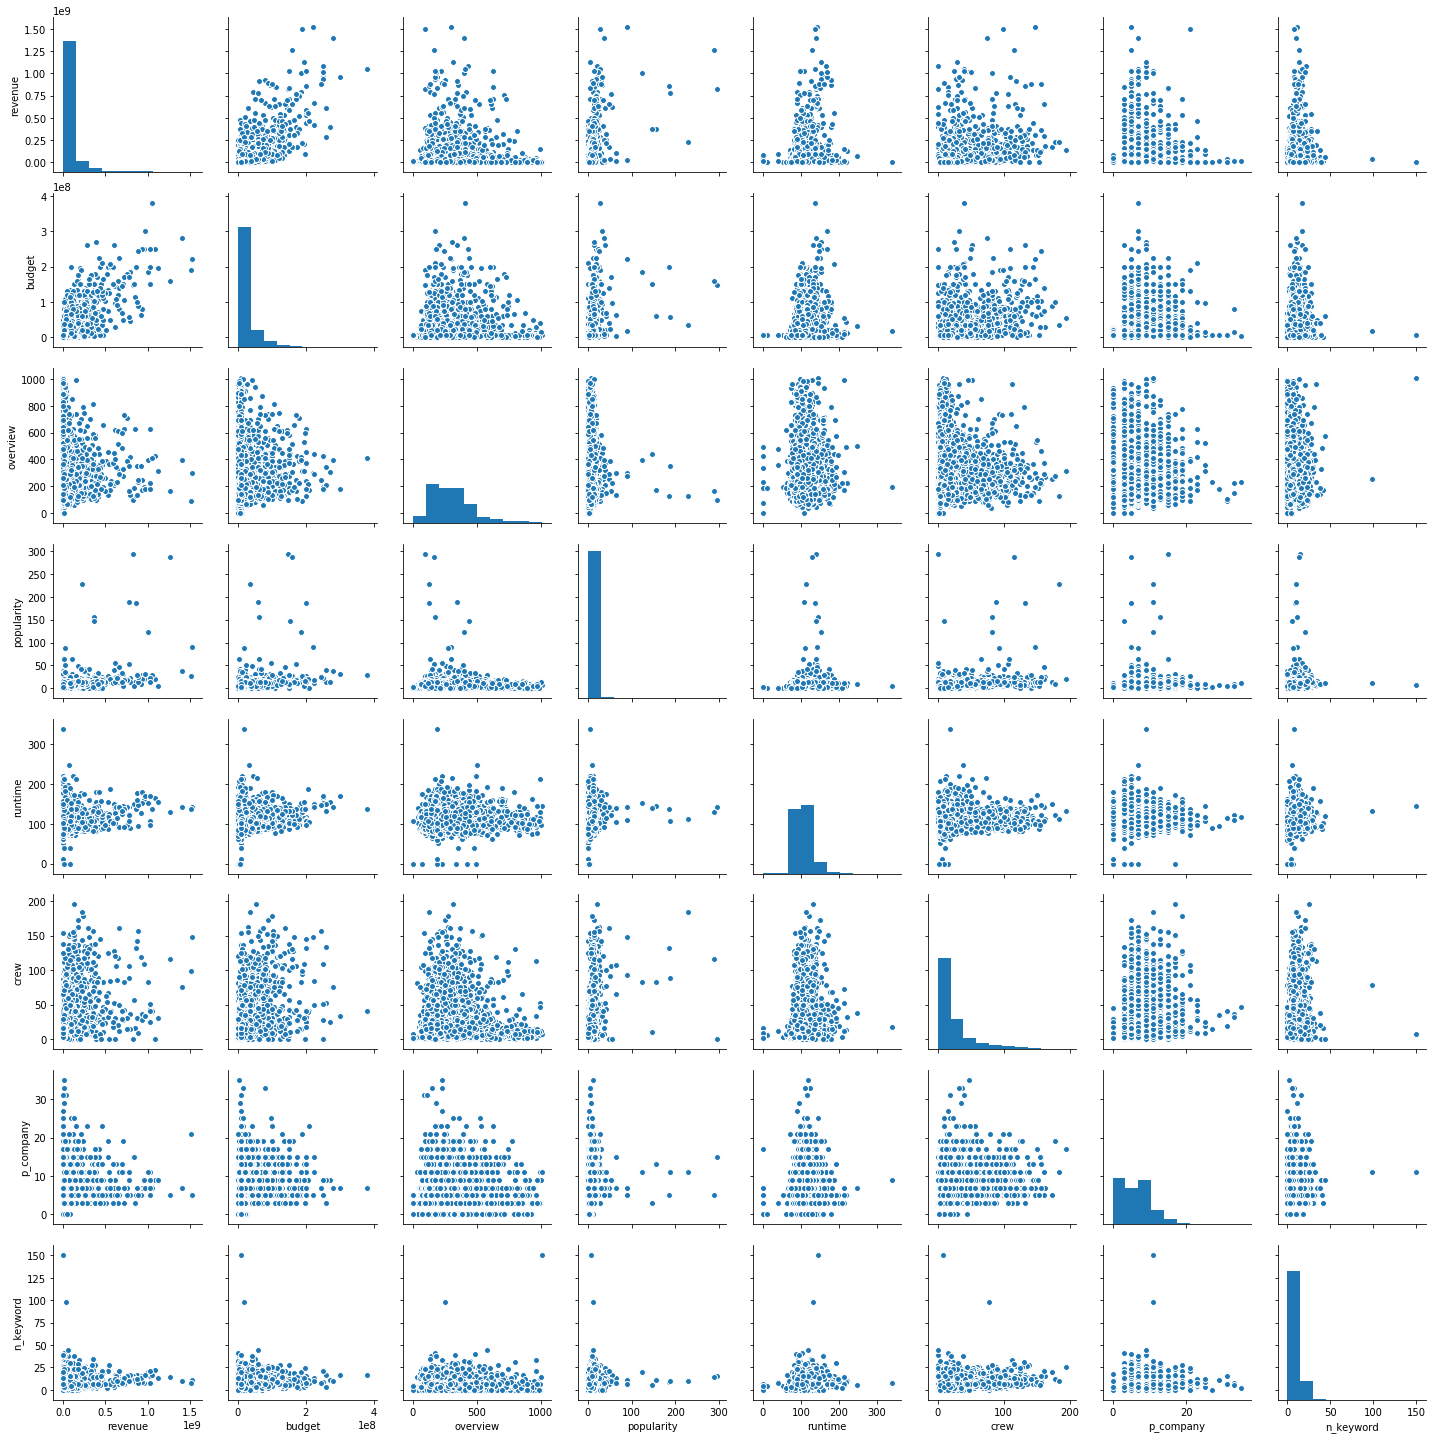

In [83]:
sns.pairplot(d_train[['revenue','budget','overview','popularity','runtime','crew','p_company','n_keyword']])
plt.show()

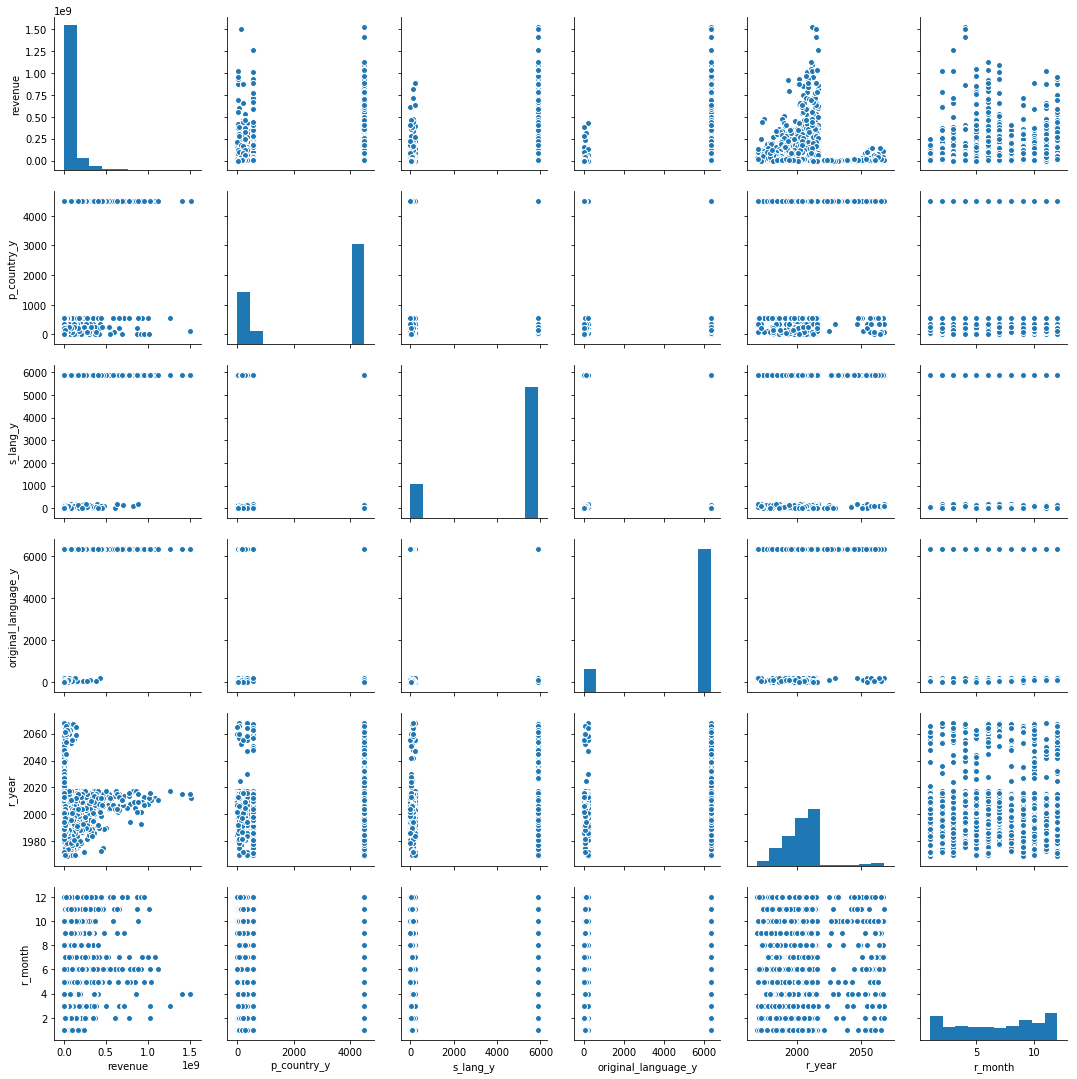

In [84]:
sns.pairplot(d_train[['revenue','p_country_y','s_lang_y','original_language_y','r_year','r_month']])
plt.show()

In [85]:
d_train.loc[d_train['r_year']>2019,'r_year'] = d_train.loc[d_train['r_year']>2019,'r_year']-100

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


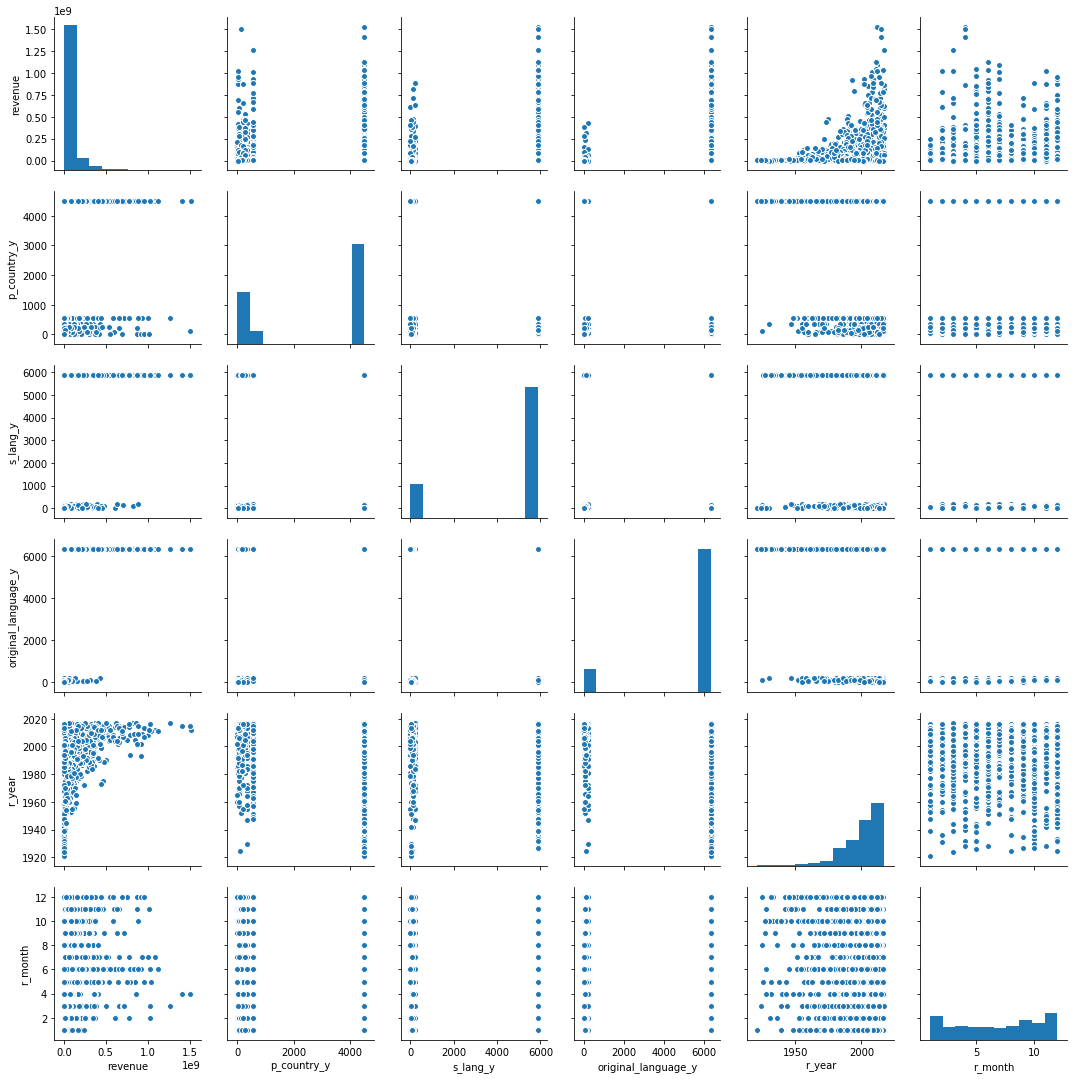

In [86]:
sns.pairplot(d_train[['revenue','p_country_y','s_lang_y','original_language_y','r_year','r_month']])
plt.show()

In [87]:
cor_mat = d_train[['revenue','p_country_y','s_lang_y','original_language_y','r_year','r_month','budget','overview','popularity','runtime','crew','p_company','n_keyword']].corr()

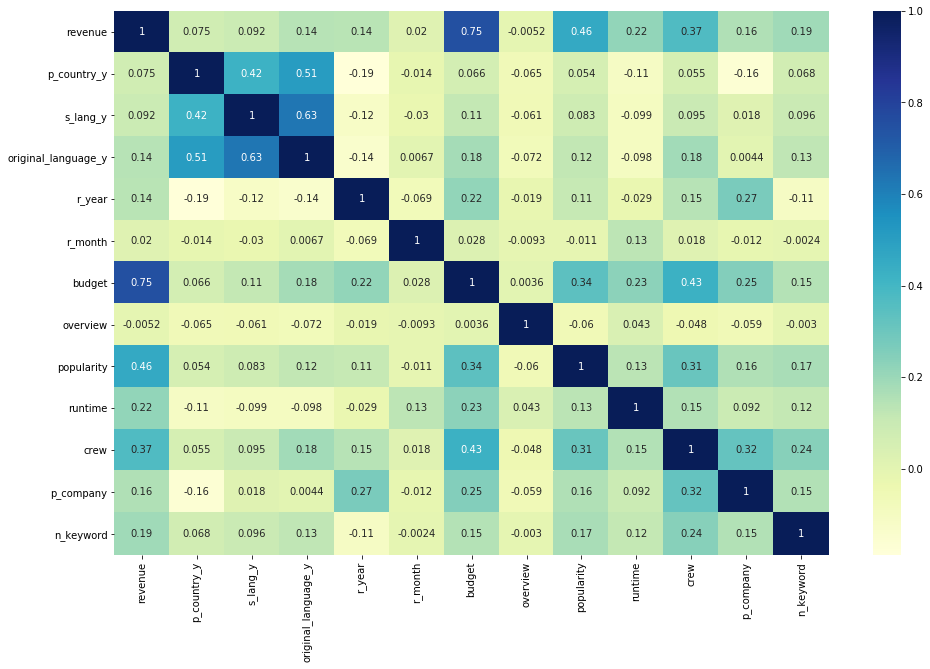

In [88]:
#Heat map of correlation metrix
plt.figure(figsize = (16, 10))
sns.heatmap(cor_mat, annot = True, cmap="YlGnBu")
plt.show()

In [89]:
d_train['ln_revenue'] = np.log(d_train['revenue'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
cor_mat = d_train[['revenue','ln_revenue','p_country_y','s_lang_y','original_language_y','r_year','r_month','budget','overview','popularity','runtime','crew','p_company','n_keyword']].corr()

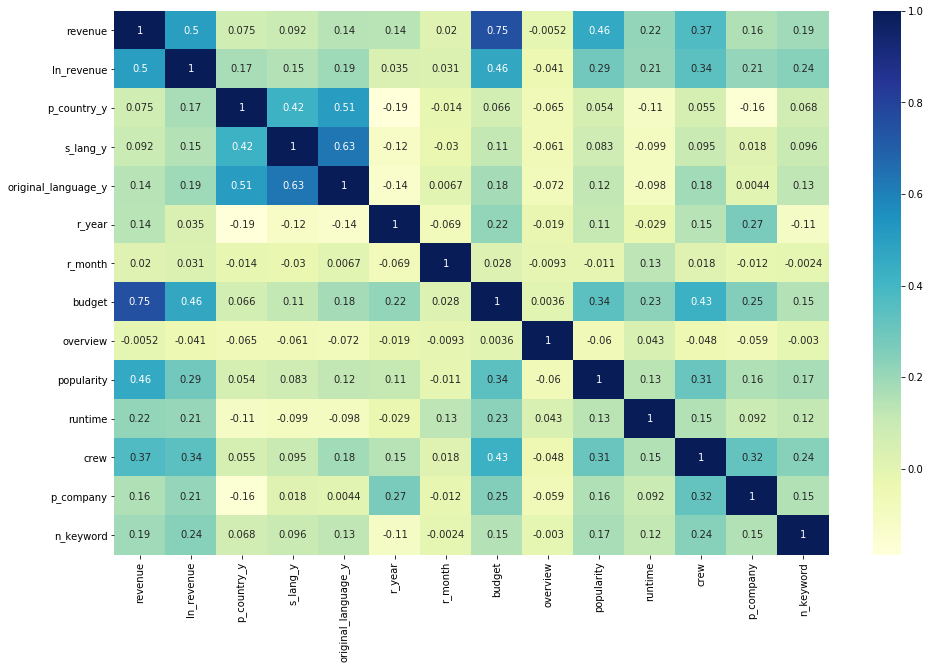

In [91]:
#Heat map of correlation metrix
plt.figure(figsize = (16, 10))
sns.heatmap(cor_mat, annot = True, cmap="YlGnBu")
plt.show()

In [92]:
d_train.drop('ln_revenue',axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
d_train_X = d_train.drop('revenue',axis=1)
d_train_y = d_train['revenue']

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
col_list = ['budget','popularity','crew','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Science Fiction','runtime','n_keyword']

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

d_train_X[col_list] = scaler.fit_transform(d_train_X[col_list])

In [97]:
d_train_X = d_train_X[col_list]

In [98]:
import statsmodels.api as sm
d_train_X = sm.add_constant(d_train_X)

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [99]:
lm_1 = sm.OLS(d_train_y,d_train_X).fit()

In [100]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     388.7
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:10:11   Log-Likelihood:                -58989.
No. Observations:                3000   AIC:                         1.180e+05
Df Residuals:                    2986   BIC:                         1.181e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.673e+07   1.53e+06     

In [101]:
d_train_X.drop(['const','Drama'],axis=1,inplace=True)

In [102]:
import statsmodels.api as sm
d_train_X = sm.add_constant(d_train_X)

In [103]:
lm_2 = sm.OLS(d_train_y,d_train_X).fit()

In [104]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:10:11   Log-Likelihood:                -58989.
No. Observations:                3000   AIC:                         1.180e+05
Df Residuals:                    2987   BIC:                         1.181e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.673e+07   1.53e+06     

In [105]:
d_train_X.drop(['const','Documentary','Crime'],axis=1,inplace=True)

In [106]:
import statsmodels.api as sm
d_train_X = sm.add_constant(d_train_X)

In [107]:
lm_3 = sm.OLS(d_train_y,d_train_X).fit()

In [108]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     505.1
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:10:11   Log-Likelihood:                -58990.
No. Observations:                3000   AIC:                         1.180e+05
Df Residuals:                    2989   BIC:                         1.181e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.673e+07   1.53e+06     

In [109]:
d_train_X.drop(['const','crew'],axis=1,inplace=True)

In [110]:
import statsmodels.api as sm
d_train_X = sm.add_constant(d_train_X)

In [111]:
lm_4 = sm.OLS(d_train_y,d_train_X).fit()

In [112]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     561.2
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        13:10:12   Log-Likelihood:                -58991.
No. Observations:                3000   AIC:                         1.180e+05
Df Residuals:                    2990   BIC:                         1.181e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.673e+07   1.53e+06     

In [113]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = d_train_X.drop('const',axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,budget,1.28
1,popularity,1.16
7,runtime,1.13
2,Adventure,1.09
4,Comedy,1.07
3,Animation,1.05
8,n_keyword,1.05
5,Family,1.02
6,Science Fiction,1.01


In [114]:
y_pred = lm_4.predict(d_train_X)

Text(0.5,0,'Errors')

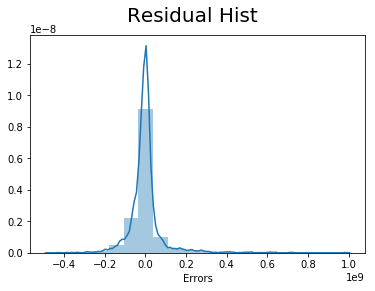

In [115]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((d_train_y - y_pred), bins = 20)
fig.suptitle('Residual Hist', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)

Text(0.5,0,'Price')

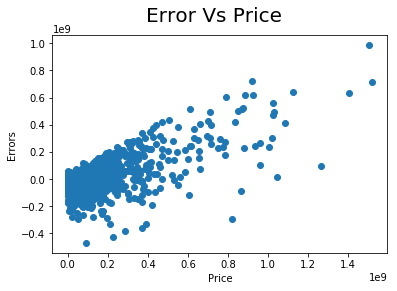

In [116]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(d_train_y,d_train_y-y_pred)
fig.suptitle('Error Vs Price', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('Price', fontsize = 10)

Text(0.5,0,'Price')

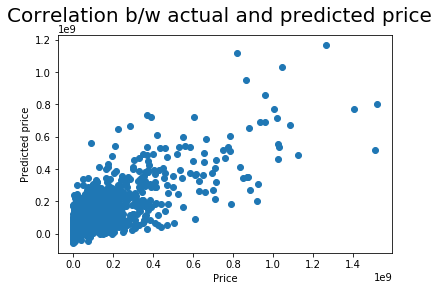

In [117]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(d_train_y,y_pred)
fig.suptitle('Correlation b/w actual and predicted price', fontsize = 20)                  # Plot heading 
plt.ylabel('Predicted price', fontsize = 10)
plt.xlabel('Price', fontsize = 10)

In [118]:
d_test_X = d_test.drop('revenue',axis=1)
d_test_y = d_test['revenue']

In [119]:
d_test_X[col_list] = scaler.transform(d_test_X[col_list])

In [120]:
d_test_X = d_test_X[col_list]

In [121]:
import statsmodels.api as sm
d_test_X = sm.add_constant(d_test_X)

In [122]:
d_test['revenue'] = lm_4.predict(d_test_X[list(d_train_X.columns)])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [123]:
submit_1 = d_test[['id','revenue']]

In [124]:
submit_1.to_csv('submit1.csv')

In [125]:
from sklearn import linear_model 

In [126]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [127]:
d_train_X2 = d_train.drop('revenue',axis=1)
d_train_y2 = d_train['revenue']

In [128]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

In [129]:
scaler1.fit(data_all[col_list])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
d_train_X2[col_list] = scaler1.transform(d_train_X2[col_list])

In [131]:
col_2 = list(d_train_X.columns)

In [132]:
col_2.pop(0)

'const'

In [133]:
col_2

['budget',
 'popularity',
 'Adventure',
 'Animation',
 'Comedy',
 'Family',
 'Science Fiction',
 'runtime',
 'n_keyword']

In [134]:
fit_1 = clf.fit(d_train_X2[col_2],d_train_y2)

In [135]:
y_pred2 = fit_1.predict(d_train_X2[col_2])

Text(0.5,0,'Errors')

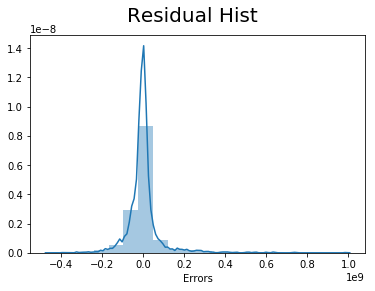

In [136]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((d_train_y2 - y_pred2), bins = 20)
fig.suptitle('Residual Hist', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)

Text(0.5,0,'Price')

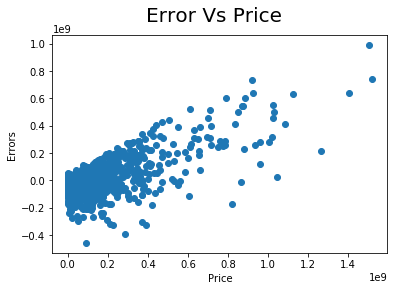

In [137]:
# Plot the scatter of the error terms/price
fig = plt.figure()
plt.scatter(d_train_y2,d_train_y2-y_pred2)
fig.suptitle('Error Vs Price', fontsize = 20)                  # Plot heading 
plt.ylabel('Errors', fontsize = 10)
plt.xlabel('Price', fontsize = 10)

In [138]:
fit_1.score(d_train_X2[col_2],d_train_y2)

0.625673869153522

In [139]:
d_test_X2 = d_test.drop('revenue',axis=1)

In [140]:
d_test_X2[col_list] = scaler1.transform(d_test_X2[col_list])

In [141]:
d_test['revenue2'] = fit_1.predict(d_test_X2[col_2])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
submit2 = d_test[['id','revenue2']]

In [143]:
submit2.to_csv('submit2.csv')

In [144]:
d_train_3 = d_train.copy()

In [145]:
d_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 34 columns):
id                     3000 non-null int64
budget                 3000 non-null float64
overview               3000 non-null float64
popularity             3000 non-null float64
runtime                3000 non-null float64
crew                   3000 non-null float64
revenue                3000 non-null int32
p_company              3000 non-null float64
n_keyword              3000 non-null float64
p_country_y            3000 non-null int64
s_lang_y               3000 non-null int64
original_language_y    3000 non-null int64
r_year                 3000 non-null float64
r_month                3000 non-null float64
Adventure              3000 non-null uint8
Animation              3000 non-null uint8
Comedy                 3000 non-null uint8
Crime                  3000 non-null uint8
Documentary            3000 non-null uint8
Drama                  3000 non-null uint8
Family         

In [146]:
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler()

d_train_3[['revenue']] = scaler3.fit_transform(d_train_3[['revenue']])

In [147]:
d_train_3[col_list] = scaler1.transform(d_train_3[col_list])

In [148]:
d_train_X3 = d_train_3[col_list]

In [149]:
d_train_y3 = d_train_3[['revenue']]

In [150]:
clf1 = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [151]:
clf1.fit(d_train_X3[col_2],d_train_y3)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [152]:
d_train_pred3 = clf1.predict(d_train_X3[col_2])

In [153]:
scaler3.inverse_transform(d_train_pred3)

array([3.41879072e+07, 1.10747503e+08, 1.77816287e+08, ...,
       1.90691257e+08, 1.50065492e+08, 9.93108922e+07])

In [154]:
d_test['revenue3'] = clf1.predict(d_test_X2[col_2])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
d_test['revenue3'] = scaler3.inverse_transform(d_test['revenue3'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
submit3 = d_test[['id','revenue3']]

In [157]:
submit3.to_csv('submit3.csv')

In [158]:
np.corrcoef(d_train['budget'],d_train['revenue'])

array([[1.        , 0.75364897],
       [0.75364897, 1.        ]])

In [159]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 34 columns):
id                     3000 non-null int64
budget                 3000 non-null float64
overview               3000 non-null float64
popularity             3000 non-null float64
runtime                3000 non-null float64
crew                   3000 non-null float64
revenue                3000 non-null int32
p_company              3000 non-null float64
n_keyword              3000 non-null float64
p_country_y            3000 non-null int64
s_lang_y               3000 non-null int64
original_language_y    3000 non-null int64
r_year                 3000 non-null float64
r_month                3000 non-null float64
Adventure              3000 non-null uint8
Animation              3000 non-null uint8
Comedy                 3000 non-null uint8
Crime                  3000 non-null uint8
Documentary            3000 non-null uint8
Drama                  3000 non-null uint8
Family         

In [161]:
d_train_X5 = d_train.drop('revenue',axis=1)
d_train_y5 = d_train['revenue']

In [162]:
d_train_X5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 33 columns):
id                     3000 non-null int64
budget                 3000 non-null float64
overview               3000 non-null float64
popularity             3000 non-null float64
runtime                3000 non-null float64
crew                   3000 non-null float64
p_company              3000 non-null float64
n_keyword              3000 non-null float64
p_country_y            3000 non-null int64
s_lang_y               3000 non-null int64
original_language_y    3000 non-null int64
r_year                 3000 non-null float64
r_month                3000 non-null float64
Adventure              3000 non-null uint8
Animation              3000 non-null uint8
Comedy                 3000 non-null uint8
Crime                  3000 non-null uint8
Documentary            3000 non-null uint8
Drama                  3000 non-null uint8
Family                 3000 non-null uint8
Fantasy        

In [165]:
col_list = list(d_train_X5.columns)

In [171]:
col_list.remove('id')

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

d_train_X5[col_list] = scaler.fit_transform(d_train_X5[col_list])

In [173]:
pca = PCA(svd_solver='randomized',random_state=15)
pca.fit(d_train_X5)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=15,
  svd_solver='randomized', tol=0.0, whiten=False)

In [175]:
# Variance covered by each Principal Component
pca.explained_variance_ratio_

array([9.99957347e-01, 3.32130943e-06, 2.91622291e-06, 1.95771591e-06,
       1.68339708e-06, 1.56259017e-06, 1.54227892e-06, 1.46427037e-06,
       1.43045766e-06, 1.41472525e-06, 1.39951307e-06, 1.38307268e-06,
       1.37322933e-06, 1.36833767e-06, 1.36561851e-06, 1.35358071e-06,
       1.35214979e-06, 1.34605800e-06, 1.33998102e-06, 1.33659912e-06,
       1.32120336e-06, 1.31313199e-06, 1.23376237e-06, 1.20388415e-06,
       1.13638989e-06, 1.04555457e-06, 9.04682773e-07, 8.21421496e-07,
       7.93963064e-07, 6.89048351e-07, 5.75074224e-07, 4.47625790e-07,
       2.56171223e-07])

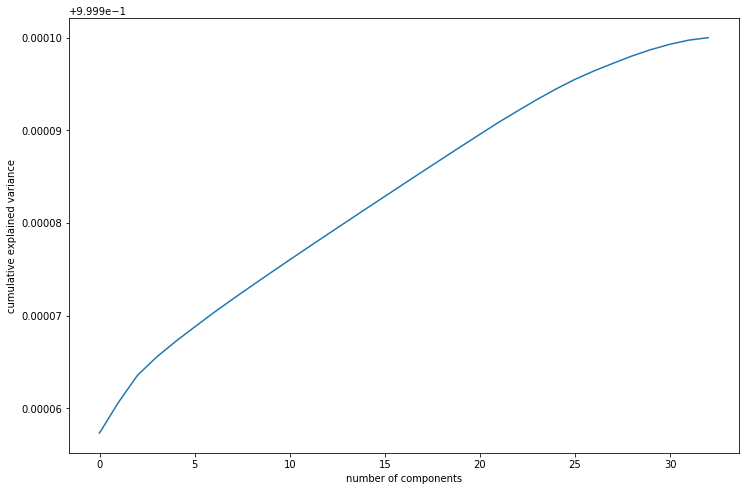

In [177]:
#SCREE plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [273]:
pca_final = IncrementalPCA(n_components=15)

In [274]:
d_train_X5_pca = pca_final.fit_transform(d_train_X5)

In [275]:
np.corrcoef(d_train_X5_pca.transpose())

array([[ 1.00000000e+00,  8.36100389e-09, -8.98636146e-09,
        -1.14982486e-08, -9.07635849e-09, -4.41189276e-09,
        -2.82607943e-09, -2.02480126e-09,  5.56009797e-09,
         2.14187696e-09,  2.66431853e-08, -1.71603639e-08,
         1.64548972e-08,  1.97718314e-08,  1.15069007e-08],
       [ 8.36100389e-09,  1.00000000e+00, -6.92888186e-04,
        -1.77163746e-04, -3.97632301e-04,  2.55484776e-04,
         6.14799054e-04, -6.95353469e-04,  1.49490854e-03,
         1.53766839e-03, -7.37898846e-04, -3.44112653e-04,
         6.56693731e-04, -1.52780288e-04,  1.22226911e-03],
       [-8.98636146e-09, -6.92888186e-04,  1.00000000e+00,
         1.80189495e-03, -3.14356324e-04,  1.15488867e-03,
        -1.29418502e-03,  1.33467496e-04,  1.63837961e-04,
        -4.43675911e-04,  2.10223404e-04,  6.95177914e-04,
        -7.37008695e-04, -1.48462759e-03, -9.37427107e-04],
       [-1.14982486e-08, -1.77163746e-04,  1.80189495e-03,
         1.00000000e+00,  1.76732623e-03,  2.88108964

In [276]:
#converting it to dataframe
pca_train_X = pd.DataFrame(data=d_train_X5_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])

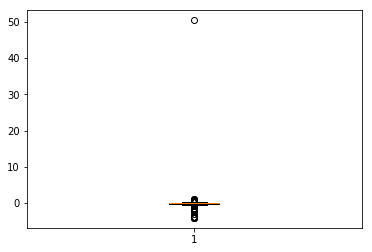

In [256]:
plt.boxplot(pca_train_X.PC7)
plt.show()

In [264]:
np.corrcoef([pca_train_X.PC7,d_train_y5])

array([[ 1.        , -0.04958961],
       [-0.04958961,  1.        ]])

In [277]:
import statsmodels.api as sm
pca_train_X = sm.add_constant(pca_train_X)

In [278]:
lm_10 = sm.OLS(d_train_y5,pca_train_X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     197.4
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:32:56   Log-Likelihood:                -59441.
No. Observations:                3000   AIC:                         1.189e+05
Df Residuals:                    2984   BIC:                         1.190e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.673e+07   1.78e+06     37.414      0.0